In [1]:
# dataset made by scikit-learn
from sklearn import datasets
x, y = datasets.make_classification(n_samples=100, n_features=2, n_classes=2, n_redundant=0,random_state=7816)
x.shape, y.shape

((100, 2), (100,))

Text(0, 0.5, 'feature 2')

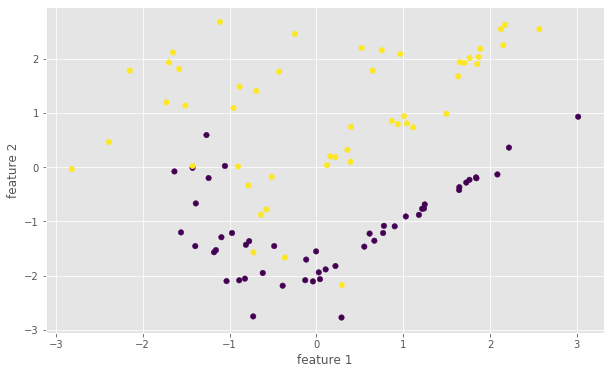

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10,6))
plt.scatter(x[:,0], x[:,1], c=y, s=30)
plt.xlabel('feature 1')
plt.ylabel('feature 2')

In [3]:
### preprocessing the data
import numpy as np
x = x.astype(np.float32)
y = y * 2 - 1

In [4]:
### split train & test data
from sklearn import model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=42)

In [5]:
x_train.shape, y_train.shape

((80, 2), (80,))

In [6]:
### train SVM model using opencv
import cv2
# create SVM model
svm = cv2.ml.SVM_create()
# set kernel
svm.setKernel(cv2.ml.SVM_LINEAR)
# train
svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)
# predict
_, y_pred = svm.predict(x_test)
# score
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)

0.8

In [7]:
import re
def validateEmail(email):
    flag = False
    if re.match("^.+\\@(\\[?)[a-zA-Z0-9\\-\\.]+\\.([a-zA-Z]{2,3}|[0-9]{1,3})(\\]?)$", email) != None:
        flag = True
    return flag

In [8]:
validateEmail('abc@1.ss')

True

In [9]:
def plot_decision_boundary_test(svm, x_test, y_test):
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    h = 0.02 # step size in mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # use xx,yy to make hypothetical data points
    return xx, yy

In [10]:
xx, yy = plot_decision_boundary_test(svm, x_test, y_test);
# yy[0,0]
# _data = np.array([xx.ravel(), yy.ravel()]).T
# print(_data[0])
dd = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
dd[0]

array([-2.63435 , -3.105599], dtype=float32)

In [11]:
def plot_decision_boundary(svm, x_test, y_test):
    x_min, x_max = x_test[:, 0].min() - 1, x_test[:, 0].max() + 1
    y_min, y_max = x_test[:, 1].min() - 1, x_test[:, 1].max() + 1
    h = 0.02 # step size in mesh
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # use xx,yy to make hypothetical data points
    x_hypo = np.c_[xx.ravel().astype(np.float32), yy.ravel().astype(np.float32)]
    _, zz = svm.predict(x_hypo)
    print(zz.shape)
    print(xx.shape)
    zz = zz.reshape(xx.shape)
#     plt.figure(figsize=(10,6))
    plt.contourf(xx,yy,zz,cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x_test[:,0],x_test[:,1],c=y_test,s=200)

(96237, 1)
(333, 289)


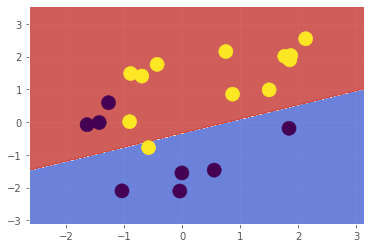

In [12]:
plot_decision_boundary(svm, x_test, y_test)

(96237, 1)
(333, 289)
(96237, 1)
(333, 289)
(96237, 1)
(333, 289)
(96237, 1)
(333, 289)


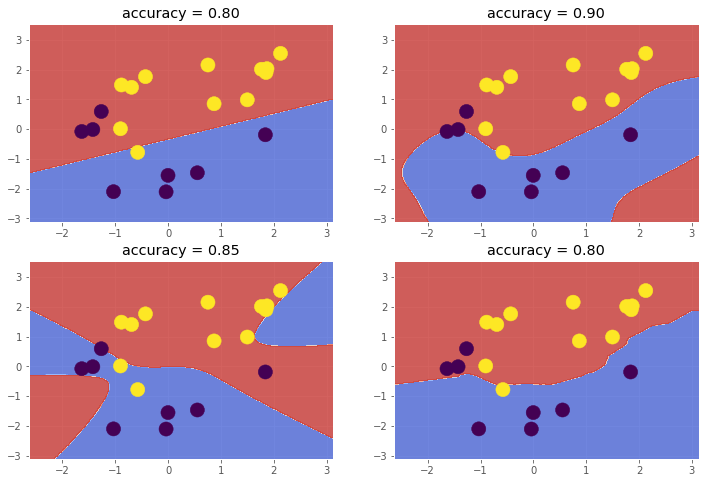

In [13]:
# compare the decision boundaries generated by different kernels
# SVM_LINEAR, SVM_POLY, SVM_RBF, SVM_SIGMOID, SVM_INTER
kernels = [cv2.ml.SVM_LINEAR, cv2.ml.SVM_RBF, cv2.ml.SVM_SIGMOID, cv2.ml.SVM_INTER]
plt.figure(figsize=(12,8))
for idx,kernel in enumerate(kernels):
    svm = cv2.ml.SVM_create()
    svm.setKernel(kernel)
    svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)
    _, y_pred = svm.predict(x_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    plt.subplot(2,2,idx+1)
    plot_decision_boundary(svm, x_test, y_test)
    plt.title('accuracy = %.2f' % accuracy)

In [14]:
### detect pedestrains in images
def extract_tar(tarfilePath, extractdir):
    try:
        import tarfile
    except ImportError:
        raise ImportError('You do not have the tarfile installed. '
                         'Try unzipping the file outside of Python.')
    tar = tarfile.open(tarfilePath)
    tar.extractall(path=extractdir)
    tar.close()
    print('%s successfully extracted to %s' % (tarfilePath, extractdir))

In [15]:
tarfilePath = '../data/chapter6/pedestrians128x64.tar.gz'
extractdir = '../data/chapter6/pedestrians128x64'
extract_tar(tarfilePath, extractdir)

../data/chapter6/pedestrians128x64.tar.gz successfully extracted to ../data/chapter6/pedestrians128x64


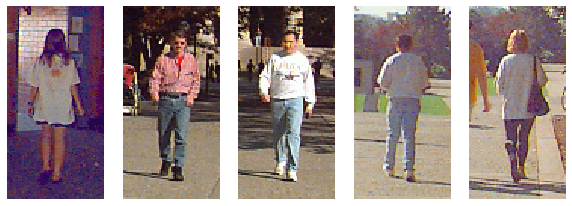

In [16]:
# visualize some sample images - version1
import cv2
from matplotlib import pyplot as plt
plt.figure(figsize=(10,6))
for i in range(5):
    img = plt.imread('../data/chapter6/pedestrians128x64/pedestrians128x64/per00%d.ppm' % (i + 100))
    plt.subplot(1,5,i+1)
    plt.imshow(img)
    plt.axis('off')

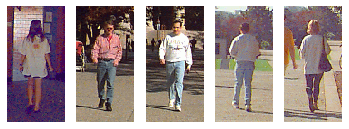

In [17]:
# visualize some sample images - version2
import cv2
import matplotlib.pyplot as plt

for i in range(5):
    filename = '../data/chapter6/pedestrians128x64/pedestrians128x64/per0010%d.ppm' % i
    img = cv2.imread(filename)
    plt.subplot(1,5,i+1)
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')

In [18]:
### the histogram of oriented gradients (HOG) - edge directions
# create HOG Descriptor
win_size = (48, 96)
block_size = (16, 16)
cell_size = (8, 8)
cell_stride = (8, 8)
num_bins = 9
hog = cv2.HOGDescriptor(win_size,block_size,cell_stride,cell_size,num_bins)

In [19]:
tarfilePath = '../data/chapter6/pedestrians_neg.tar.gz'
extractdir = '../data/chapter6/pedestrians_neg'
extract_tar(tarfilePath, extractdir)

../data/chapter6/pedestrians_neg.tar.gz successfully extracted to ../data/chapter6/pedestrians_neg


In [21]:
# create the negative samples - non-pedestrians images
import os
import numpy as np

np.random.RandomState(42)
non_pedestrians_dir = '../data/chapter6/pedestrians_neg/pedestrians_neg'
hroi = 128
wroi = 64
x_neg = []
for negfile in os.listdir(non_pedestrians_dir):
    imgpath = '%s/%s' % (non_pedestrians_dir,negfile)
    img = cv2.imread(imgpath)
    img = cv2.resize(img, (512, 512))
    for i in range(5):
        rand_y = np.random.randint(0, img.shape[0] - hroi)
        rand_x = np.random.randint(0, img.shape[1] - wroi)
        roi = img[rand_y : rand_y + hroi, rand_x : rand_x + wroi, :]
        if(i == 1):
            cv2.imwrite(imgpath + '_cut.jpg', roi)
        x_neg.append(hog.compute(roi, (64, 64)))

In [22]:
# create the positive samples - pedestrians images
import random
random.seed(42)
x_pos = []
for i in random.sample(range(900), 400):
    imgpath = '../data/chapter6/pedestrians128x64/pedestrians128x64/per%05d.ppm' % i
    img = cv2.imread(imgpath)
    if img is None:
        print('Could not find image %s' % imgpath)
        continue
    x_pos.append(hog.compute(img, (64, 64)))

Could not find image ../data/chapter6/pedestrians128x64/pedestrians128x64/per00000.ppm


In [24]:
# convert to float32 for opencv
x_neg = np.array(x_neg, dtype=np.float32)
x_pos = np.array(x_pos, dtype=np.float32)
print(x_neg.shape)
print(x_pos.shape)

(250, 1980, 1)
(399, 1980, 1)


In [25]:
# label 1 for pedestrians and -1 for non-pedestrians
y_pos = np.ones(x_pos.shape[0], dtype=np.int32)
y_neg = -np.ones(x_neg.shape[0], dtype=np.int32)

In [26]:
# the whole x and y
x = np.concatenate((x_pos, x_neg))
y = np.concatenate((y_pos, y_neg))

In [54]:
# split train & test sets
from sklearn import model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state=42)

In [55]:
x_train.shape

(519, 1980, 1)

In [56]:
### implement the SVM
# create and train SVM
import cv2
def train_svm(x_train, y_train):
    svm = cv2.ml.SVM_create()
    svm.train(x_train, cv2.ml.ROW_SAMPLE, y_train)
    return svm

from sklearn import metrics
# socre the SVM model
def score_svm(svm, x, y):
    _, y_pred = svm.predict(x)
    return metrics.accuracy_score(y, y_pred)

In [57]:
svm = train_svm(x_train, y_train)
print(score_svm(svm, x_train, y_train))
print(score_svm(svm, x_test, y_test))

1.0
0.6461538461538462


In [58]:
### bootstrapping svm model - the maximum iteration = 3
score_train = []
socre_test = []
for i in range(3):
    svm = train_svm(x_train, y_train)
    score_train.append(score_svm(svm, x_train, y_train))
    socre_test.append(score_svm(svm, x_test, y_test))
    _, y_pred = svm.predict(x_test)
    diff = np.logical_and(y_pred.ravel() == 1, y_test.ravel() == -1)
    if not np.any(diff):
        print('no more false positives: done')
        break
    x_train = np.concatenate((x_train, x_test[diff, :]), axis=0)
    y_train = np.concatenate((y_train, y_test[diff]), axis=0)

print(score_train)
print(socre_test)

no more false positives: done
[1.0, 1.0]
[0.6461538461538462, 1.0]


In [61]:
### using opencv built-in SVM to detect pedestrians
import cv2

img_path = '../data/chapter6/pedestrian_test.jpg'
img = cv2.imread(img_path)

pdetect = cv2.HOGDescriptor_getDefaultPeopleDetector()
hogdef = cv2.HOGDescriptor()
hogdef.setSVMDetector(pdetect)
found, _ = hogdef.detectMultiScale(img)

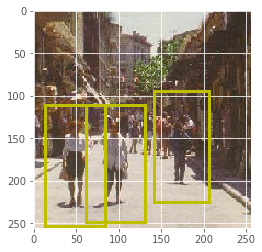

In [76]:
from matplotlib import pyplot as plt
from matplotlib import patches
fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
# ax.axis('off')
# show the bounding box
for f in found:
    ax.add_patch(patches.Rectangle((f[0], f[1]), f[2], f[3], color='y', linewidth=3, fill=False))